In [139]:
import pandas as pd
from scipy.optimize import curve_fit
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
%pylab inline
import seaborn as sns
sns.set()

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('axes', titlesize=14)
matplotlib.rc('axes', labelsize=14)

Populating the interactive namespace from numpy and matplotlib


In [207]:
d = pd.ExcelFile("sample_Z_SMUG1.xlsx")
d.parse("Sheet1")

,time,mean,std
0,0.083333,0.006355,0.001190
1,0.166667,0.007063,0.001030
2,0.500000,0.009766,0.000342
3,1.000000,0.011789,0.000658
4,2.000000,0.016536,0.003535
5,5.000000,0.020994,0.008703
6,10.000000,0.030195,0.009828
7,60.000000,0.034675,0.007285


In [208]:
Dtime = d.parse("Sheet1").iloc[:,0].values
Dmean = d.parse("Sheet1").iloc[:,1].values
Dstd  = d.parse("Sheet1").iloc[:,2].values

In [178]:
# Define fititng functions
# def func(x, a, b, k):
#     return a*(1 - np.exp(-k*x)) + b
def func1(x, a1, k1):
    return a1*(1 - np.exp(-k1*x))

def func2(x, a1, k1, a2, k2):
    return a1*(1 - np.exp(-k1*x)) + a2*(1 - np.exp(-k2*x))

def func1x(x, a1, k1, a2):
    return a1*(1 - np.exp(-k1*x)) + a2

def func3(x, a1, k1, a2, k2, a3, k3):
    return a1*(1 - np.exp(-k1*x)) + a2*(1 - np.exp(-k2*x)) + a3*(1 - np.exp(-k3*x))

def func4(x, a1, k1, a2, k2, a3, k3, a4, k4):
    return a1*(1 - np.exp(-k1*x)) + a2*(1 - np.exp(-k2*x)) + a3*(1 - np.exp(-k3*x)) + a4*(1 - np.exp(-k4*x))

def func_test(x):
    a1 = 0.189
    k1 = 0.104
    a2 = 0.470
    k2 = 6.723
    return a1*(1 - np.exp(-k1*x)) + a2*(1 - np.exp(-k2*x))



def print_fitting_coef(f, x, y):
    popt, pcov = curve_fit(f, x, y)

    residuals = y - f(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    if len(popt)==2:
        print("Fitting with y = A1*(1-exp(-k1*x))")
        print("A1 = %.8s +/- %.8s;" % (popt[0], pcov[0,0]**0.5))
        print("k1 = %.8s +/- %.8s;" % (popt[1], pcov[1,1]**0.5))
    elif len(popt)==4:
        print("Fitting with y = A1*(1-exp(-k1*x)) + A2*(1-exp(-k2*x))")
        print("A1 = %.8s +/- %.8s;" % (popt[0], pcov[0,0]**0.5))
        print("k1 = %.8s +/- %.8s;" % (popt[1], pcov[1,1]**0.5))
        print("A2 = %.8s +/- %.8s;" % (popt[2], pcov[2,2]**0.5))
        print("k2 = %.8s +/- %.8s;" % (popt[3], pcov[3,3]**0.5))
    elif len(popt)==6:
        print("Fitting with y = A1*(1-exp(-k1*x)) + A2*(1-exp(-k2*x)) + A3*(1-exp(-k3*x))")
        print("A1 = %.8s +/- %.8s;" % (popt[0], pcov[0,0]**0.5))
        print("k1 = %.8s +/- %.8s;" % (popt[1], pcov[1,1]**0.5))
        print("A2 = %.8s +/- %.8s;" % (popt[2], pcov[2,2]**0.5))
        print("k2 = %.8s +/- %.8s;" % (popt[3], pcov[3,3]**0.5))
        print("A3 = %.8s +/- %.8s;" % (popt[4], pcov[4,4]**0.5))
        print("k3 = %.8s +/- %.8s;" % (popt[5], pcov[5,5]**0.5))
    elif len(popt)==8:
        print("Fitting with y = A1*(1-exp(-k1*x)) + A2*(1-exp(-k2*x)) + A3*(1-exp(-k3*x))")
        print("A1 = %.8s +/- %.8s;" % (popt[0], pcov[0,0]**0.5))
        print("k1 = %.8s +/- %.8s;" % (popt[1], pcov[1,1]**0.5))
        print("A2 = %.8s +/- %.8s;" % (popt[2], pcov[2,2]**0.5))
        print("k2 = %.8s +/- %.8s;" % (popt[3], pcov[3,3]**0.5))
        print("A3 = %.8s +/- %.8s;" % (popt[4], pcov[4,4]**0.5))
        print("k3 = %.8s +/- %.8s;" % (popt[5], pcov[5,5]**0.5))
        print("A4 = %.8s +/- %.8s;" % (popt[6], pcov[6,6]**0.5))
        print("k4 = %.8s +/- %.8s;" % (popt[7], pcov[7,7]**0.5))
    
    print("R^2 = %.6s" %(r_squared))

In [154]:
for f in (func1, func2):
    print_fitting_coef(f, Dtime, Dmean)

Fitting with y = A1*(1-exp(-k1*x))
A1 = 0.573409 +/- 0.026212;
k1 = 4.270396 +/- 1.037146;
R^2 = 0.8400
Fitting with y = A1*(1-exp(-k1*x)) + A2*(1-exp(-k2*x))
A1 = -0.33513 +/- 2712535.;
k1 = 4.270453 +/- 97304.20;
A2 = 0.908539 +/- 2712535.;
k2 = 4.270585 +/- 35700.74;
R^2 = 0.8400


/Users/rliu/miniconda/envs/lsst/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


In [209]:
popt1, pcov1 = curve_fit(func1, Dtime, Dmean)
popt2, pcov2 = curve_fit(func2, Dtime, Dmean)
popt3, pcov3 = curve_fit(func1x, Dtime, Dmean)
# popt3, pcov3 = curve_fit(func3, Dtime, Dmean)
popt3

/Users/rliu/miniconda/envs/lsst/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


array([0.02778045, 0.17063027, 0.00688479])

In [30]:
XLB = 0.0     # Lower boundary of x axis
XUB = 60.0  # Upper boundary of x axis
x_plot = np.linspace(XLB, XUB, num=5*(XUB-XLB), endpoint=True)

/Users/rliu/miniconda/envs/lsst/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


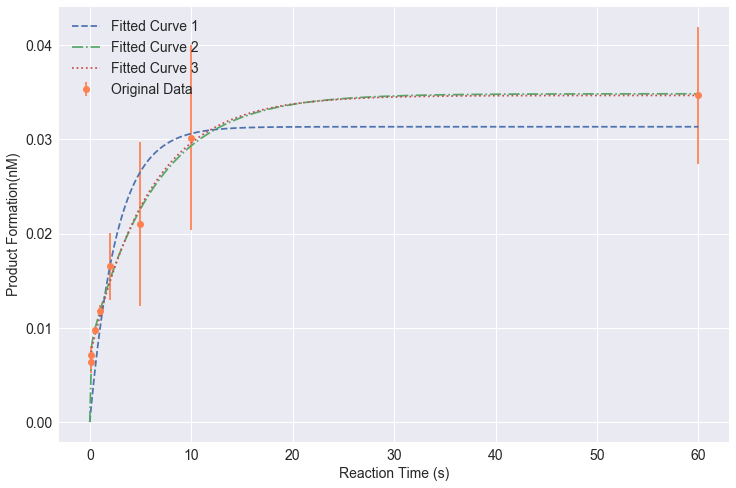

In [210]:
plt.figure(figsize=(12, 8))

# Plot original data
plt.errorbar(Dtime, Dmean, yerr=Dstd, fmt='o', color='coral', label='Original Data')

# Plot fitting curve
plt.plot(x_plot, func1(x_plot, *popt1), ls='--', label='Fitted Curve 1')
plt.plot(x_plot, func2(x_plot, *popt2), ls='-.', label='Fitted Curve 2')
plt.plot(x_plot, func1x(x_plot, *popt3), ls='dotted', label='Fitted Curve 3')
# plt.text(0.4*XUB, 0.25, "$k = %.4s min^{-1}$   $R^2 = %.6s$" %(60.0*popt[1], r_squared)) #解释文字的位置和内容

plt.xlabel('Reaction Time (s)')
plt.ylabel('Product Formation(nM)')
plt.legend(loc='best', fontsize=14)

In [211]:
# Calculate Chi2
DoF = len(Dmean)-3
sigma = Dstd
chi_squared = np.sum(((Dmean - func1x(Dtime, *popt3))/sigma)**2)/DoF
chi_squared

1.0101593623771064

In [212]:
DoF = len(Dmean)-2
sigma = Dstd
chi_squared = np.sum(((Dmean - func1(Dtime, *popt1))/sigma)**2)/DoF
chi_squared

36.45762181482757

In [213]:
DoF = len(Dmean)-4
sigma = Dstd
chi_squared = np.sum(((Dmean - func2(Dtime, *popt2))/sigma)**2)/DoF
chi_squared

0.24844867950326827

In [199]:
DoF = len(Dmean)-3
sigma = Dstd/np.sqrt(2)
chi_squared = np.sum(((Dmean - func_test(Dtime))/sigma)**2)/DoF
chi_squared

6141.375169289883

In [196]:
(Dmean - func1(Dtime, *popt1))/sigma

array([-3.07674467, -5.78260846, -4.17811373, -7.06822184, -3.67843236,
       -0.86349533,  0.3086414 ,  0.30267489, -0.35744361, -0.9637596 ,
        0.65377063])